# Dataset Overview

In [1]:
from pyforest import*

In [2]:
lazy_imports()

['from sklearn.preprocessing import RobustScaler',
 'import sys',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.cluster import KMeans',
 'import pickle',
 'import pydot',
 'import bokeh',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.linear_model import ElasticNetCV',
 'import matplotlib.pyplot as plt',
 'import pandas as pd',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import LassoCV',
 'import sklearn',
 'from scipy import signal as sg',
 'from xlrd import open_workbook',
 'from sklearn import metrics',
 'import matplotlib as mpl',
 'import altair as alt',
 'import imutils',
 'import plotly.graph_objs as go',
 'from pyspark import SparkContext',
 'import statistics',
 'import numpy as np',
 'from sklearn.decomposition import PCA',
 'import dash',
 'import awswrangler as wr',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_s

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data=pd.read_csv('bigmart_train.csv')
test_data=pd.read_csv('bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train_data.shape

(8523, 12)

In [8]:
test_data.shape

(5681, 11)

In [9]:
# summary statistics
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [11]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
train_data['source']='train'
test_data['source']='test'
data=pd.concat([train_data,test_data],ignore_index=True)

<IPython.core.display.Javascript object>

In [15]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [18]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [16]:
data.isnull().sum()
# we will not have outlet sales in testing data so that is why we are having NAN 

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [22]:
data.shape

(14204, 13)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

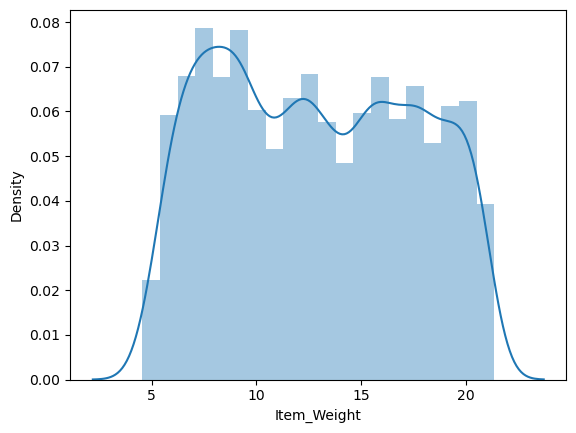

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

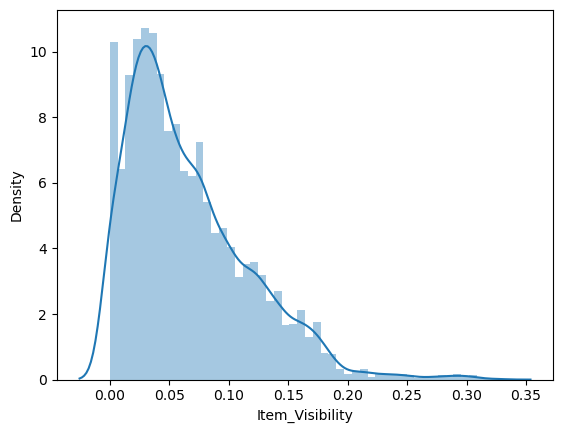

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

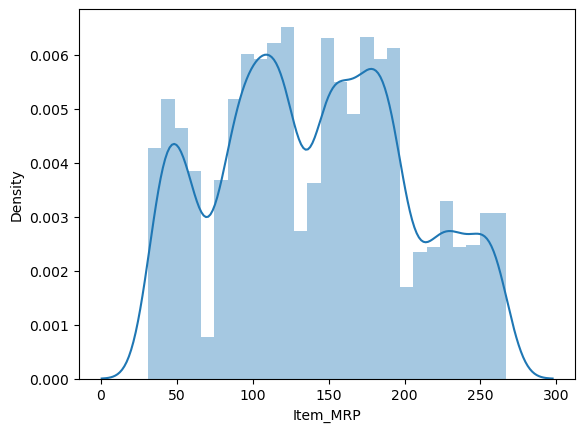

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

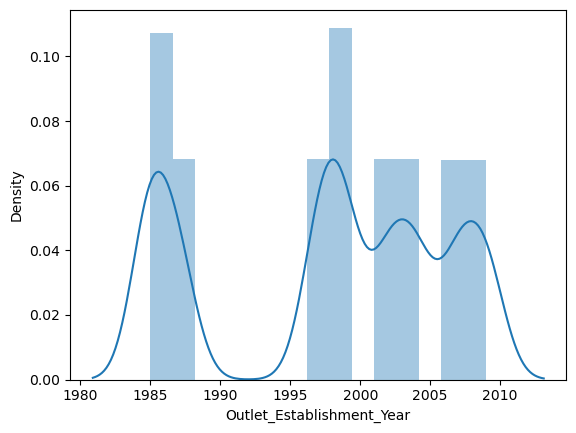

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

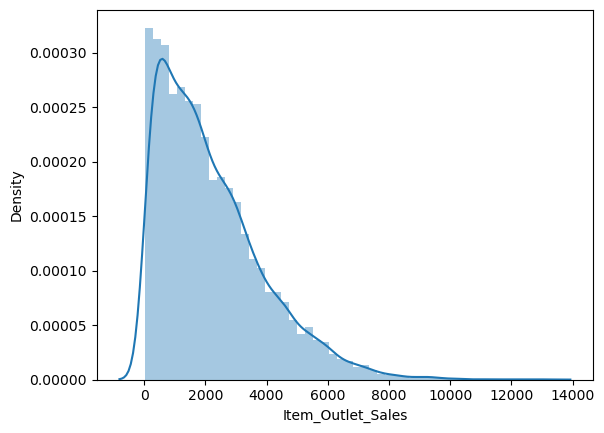

In [24]:
for i in train_data.describe().columns: #describe will be working on numerical columns
    sns.distplot(train_data[i].dropna())
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

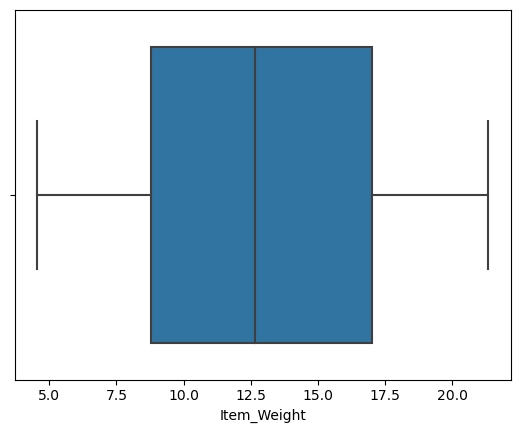

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

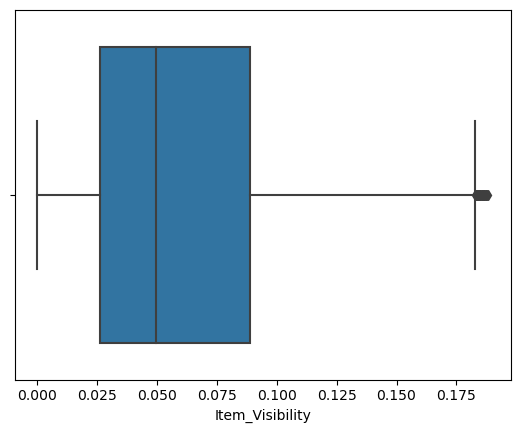

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

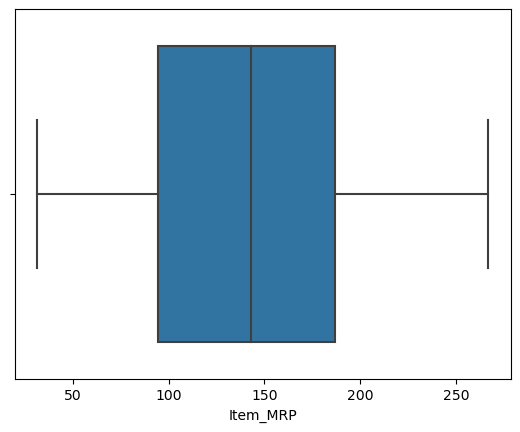

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

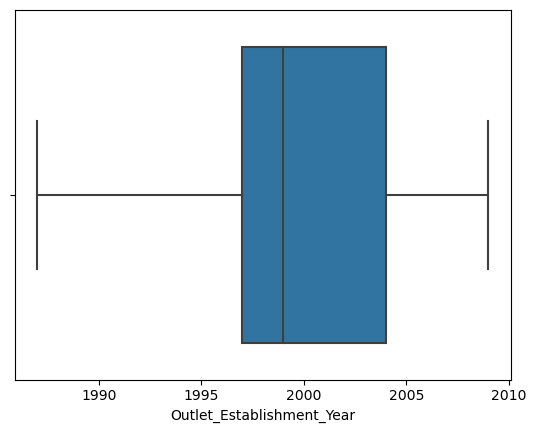

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

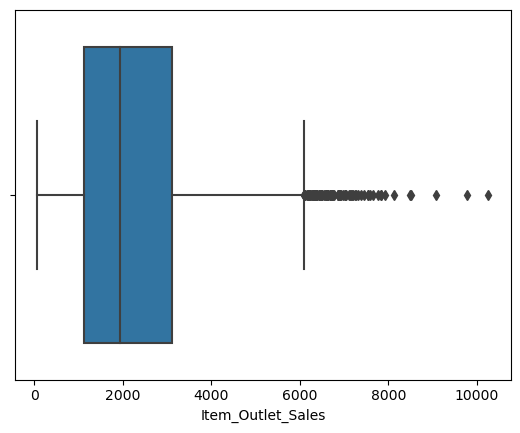

In [30]:
for i in train_data.describe().columns:
    sns.boxplot(x=i, data=train_data.dropna())
    #plt.title(f'Boxplot of {i}')
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

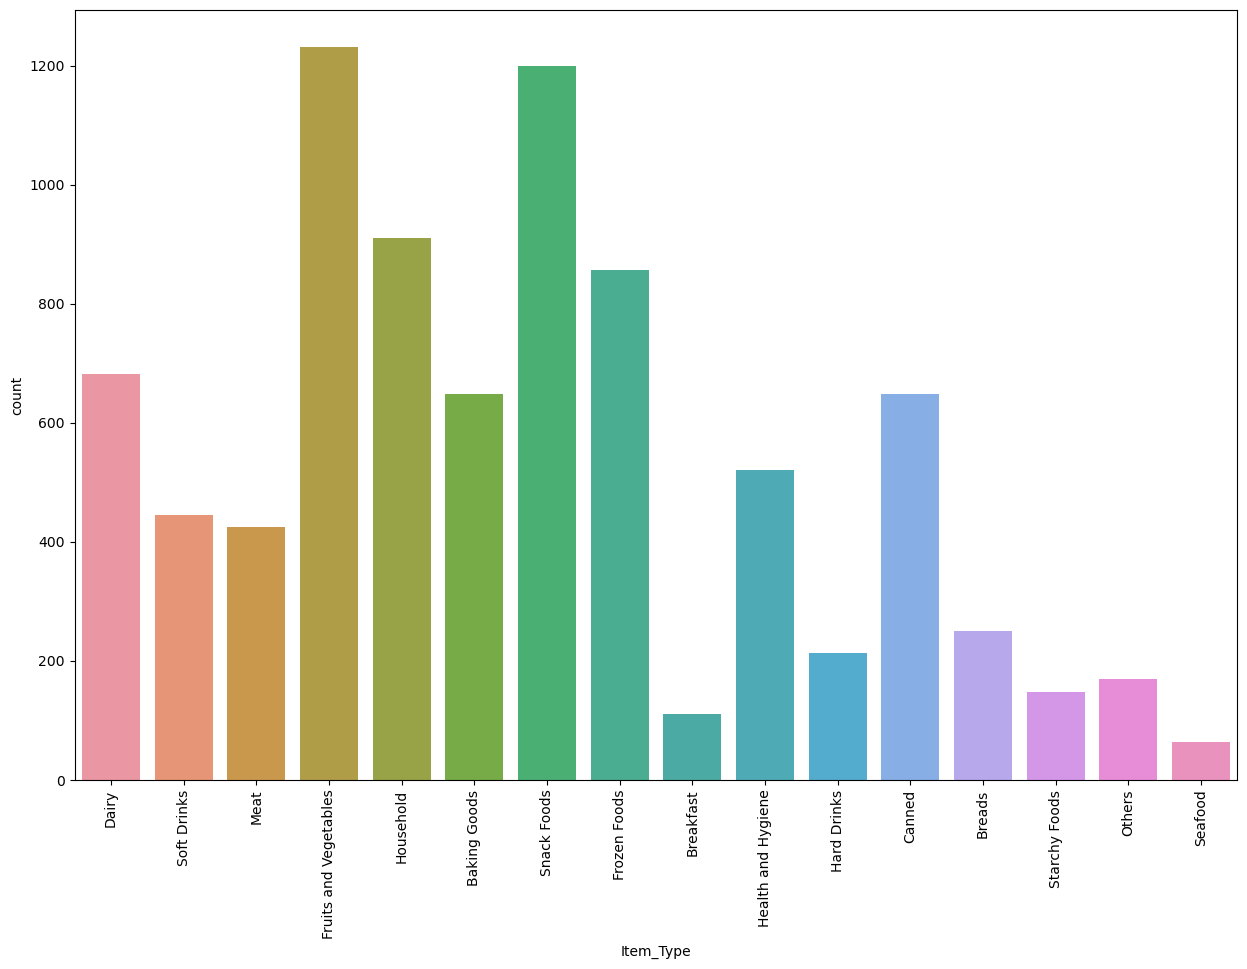

In [34]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Item_Type', data=train_data)
plt.xticks(rotation=90)
plt.show()


In [35]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# Distribution of Outlet Size

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Outlet_Size', ylabel='count'>

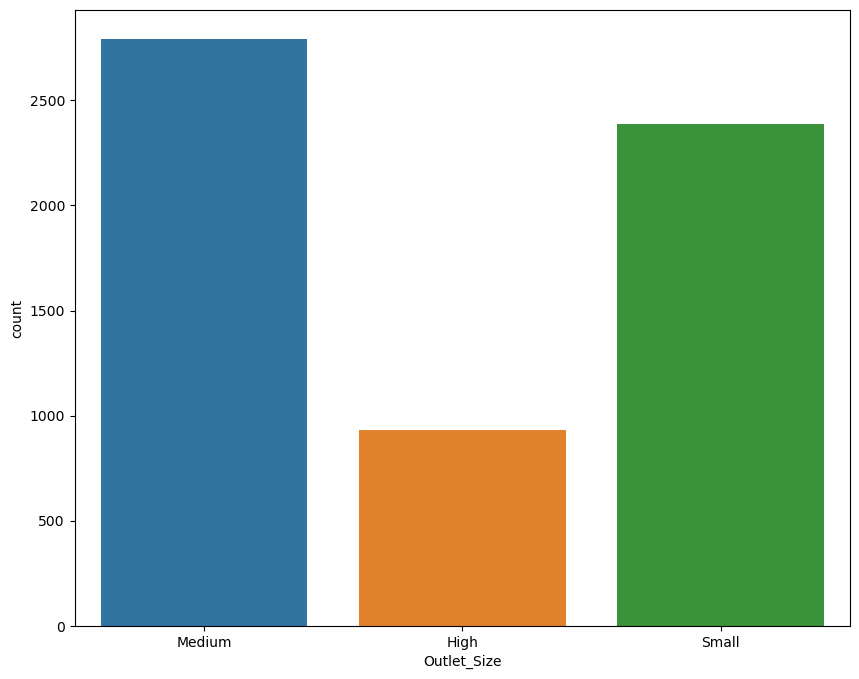

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(x='Outlet_Size',data=train_data)

In [44]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

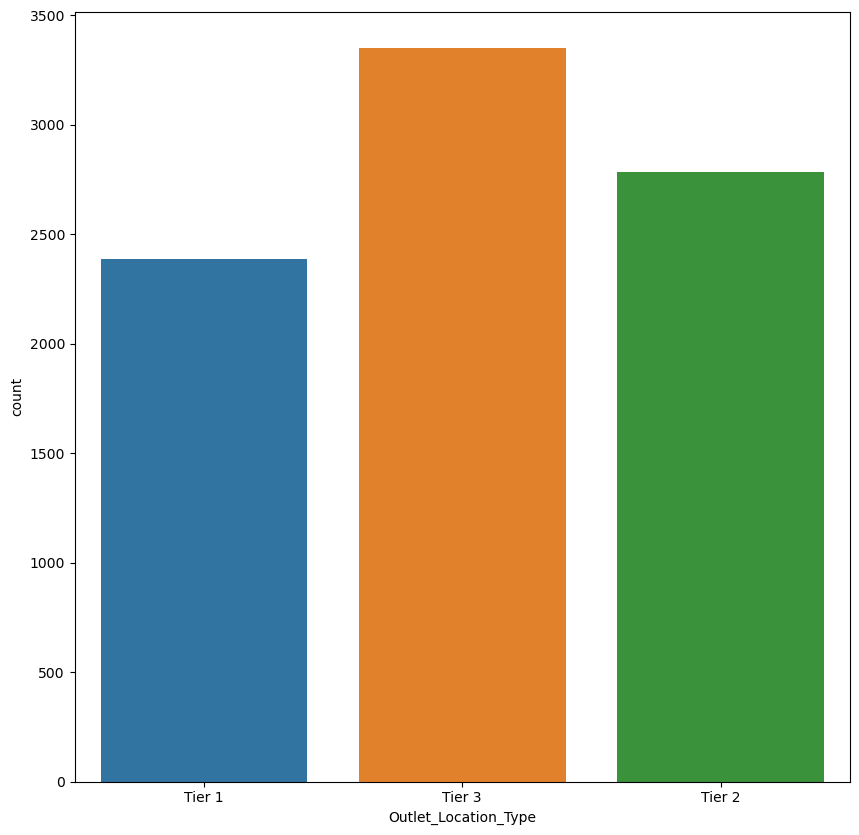

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Location_Type',data=train_data)

In [46]:
train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

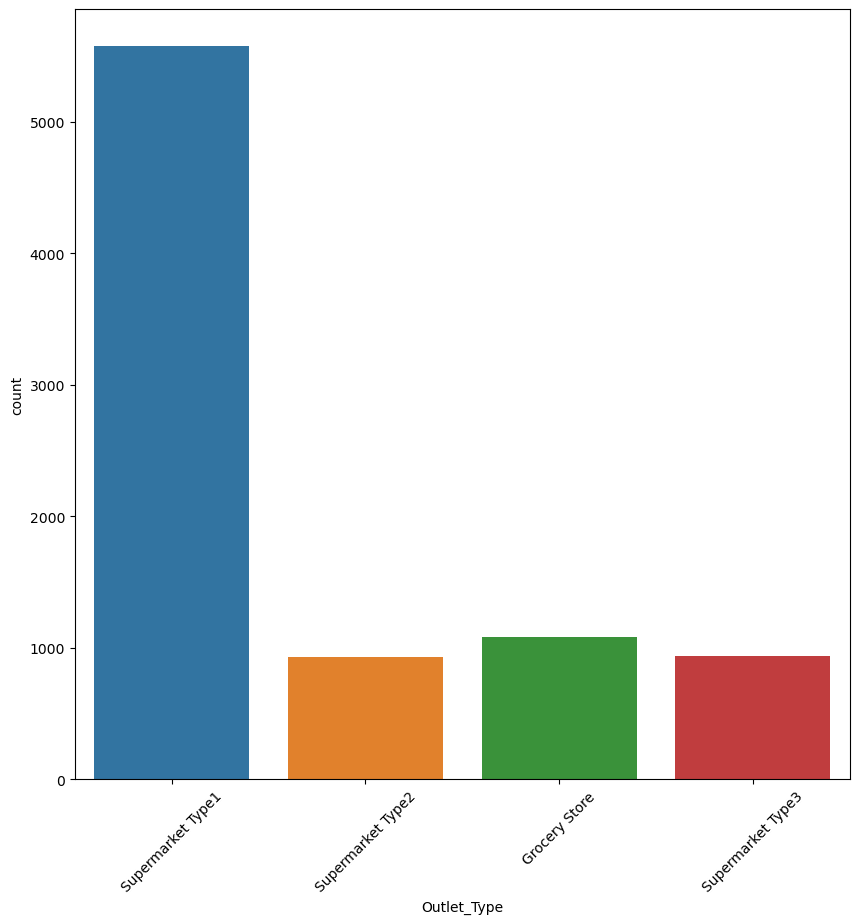

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Type',data=train_data)
plt.xticks(rotation=45)

In [48]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Analysis'}, xlabel='Item Weight', ylabel='Item_Outlet_Sales'>

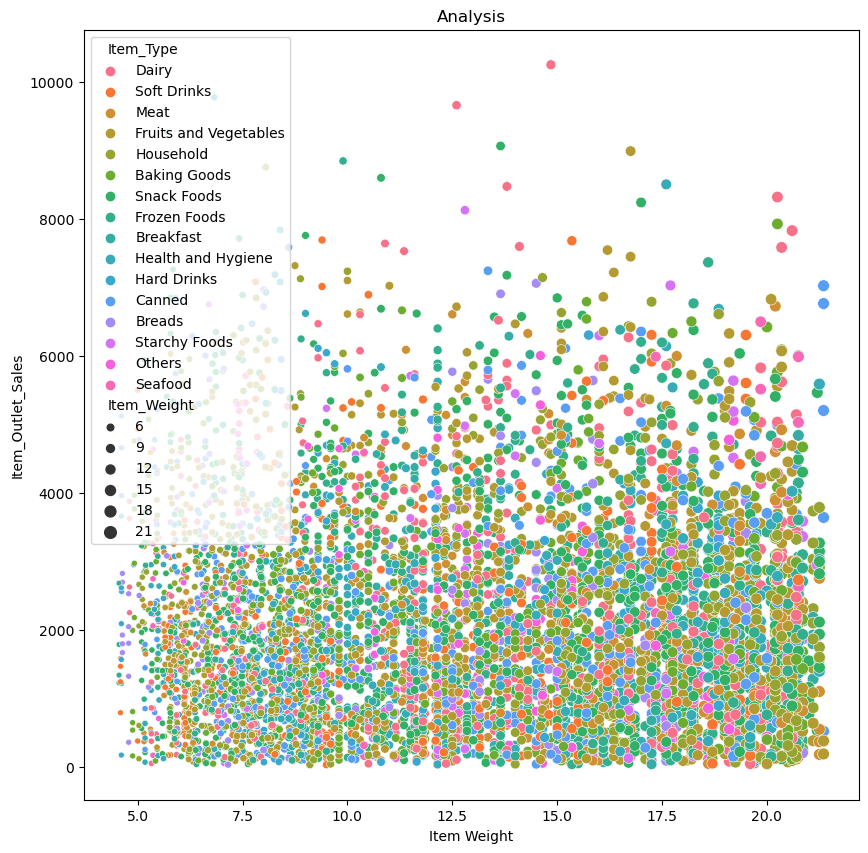

In [51]:
plt.figure(figsize=(10,10))
plt.xlabel('Item Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Analysis')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Analysis'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

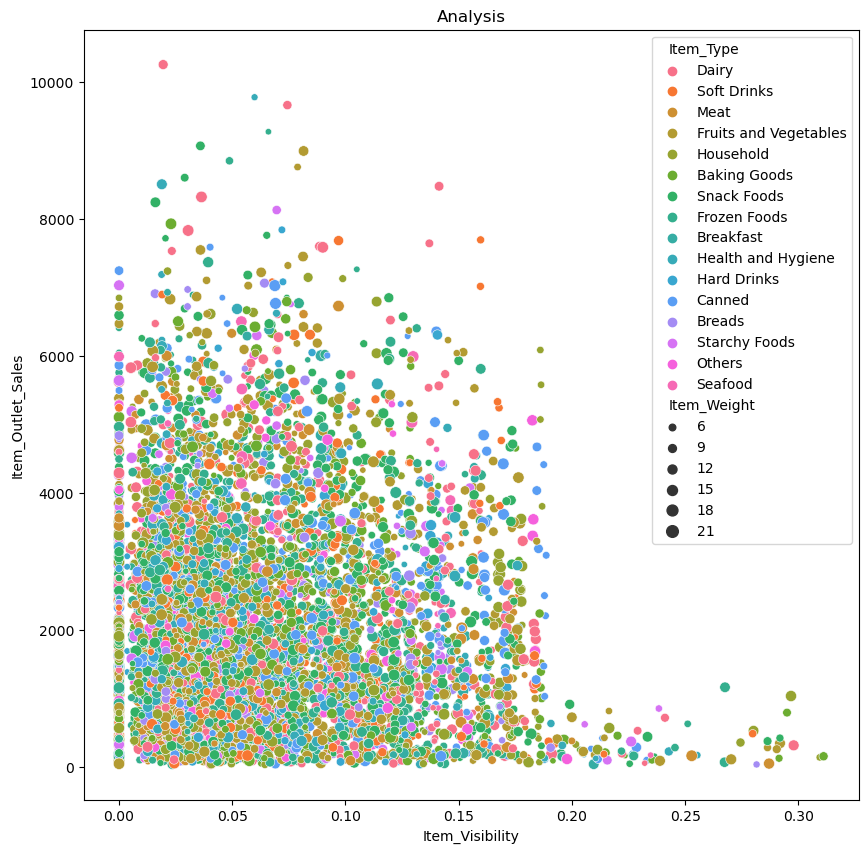

In [56]:
plt.figure(figsize=(10,10))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Analysis')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

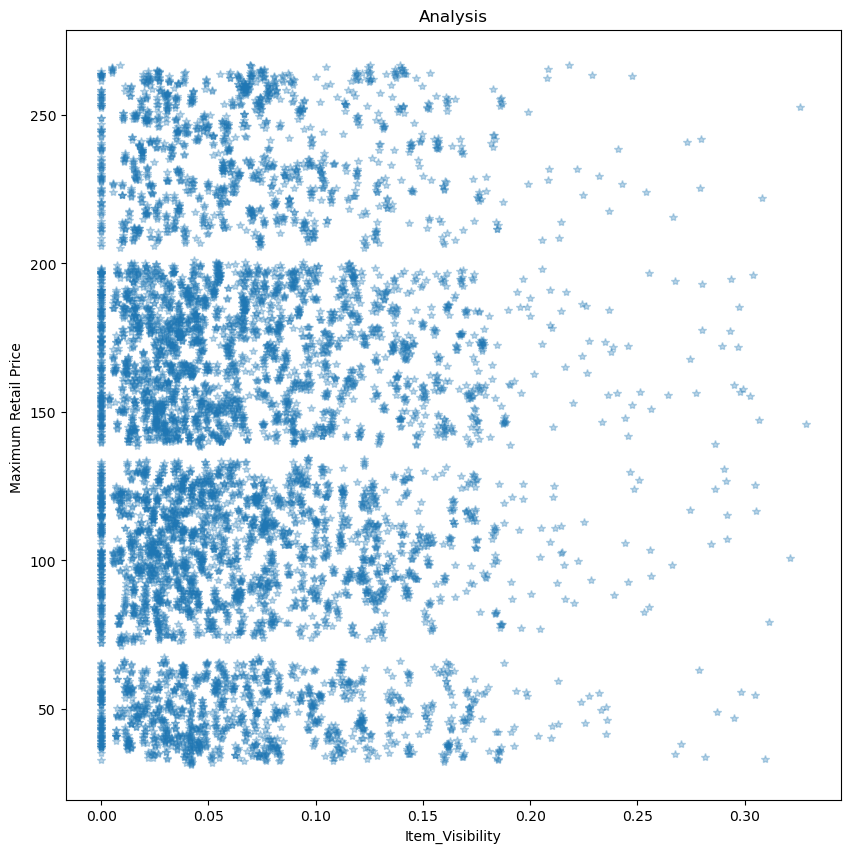

In [59]:
plt.figure(figsize=(10,10))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price ')
plt.title('Analysis')
plt.plot(train_data.Item_Visibility,train_data.Item_MRP,'*',alpha=0.3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Grocery Store'),
  Text(1, 0, 'Supermarket Type1'),
  Text(2, 0, 'Supermarket Type2'),
  Text(3, 0, 'Supermarket Type3')])

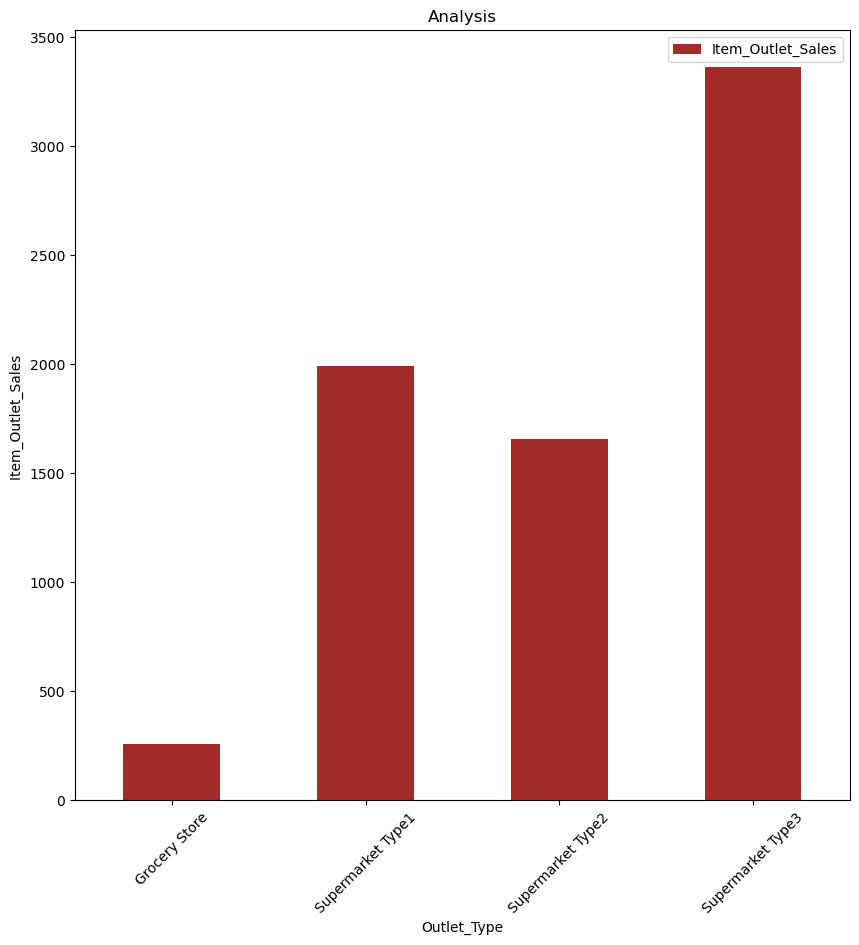

In [60]:
outlet_type_pivot= \
train_data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)
outlet_type_pivot.plot(kind='bar',color='brown',figsize=(10,10))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales ')
plt.title('Analysis')
plt.xticks(rotation=45)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LF'),
  Text(1, 0, 'Low Fat'),
  Text(2, 0, 'Regular'),
  Text(3, 0, 'low fat'),
  Text(4, 0, 'reg')])

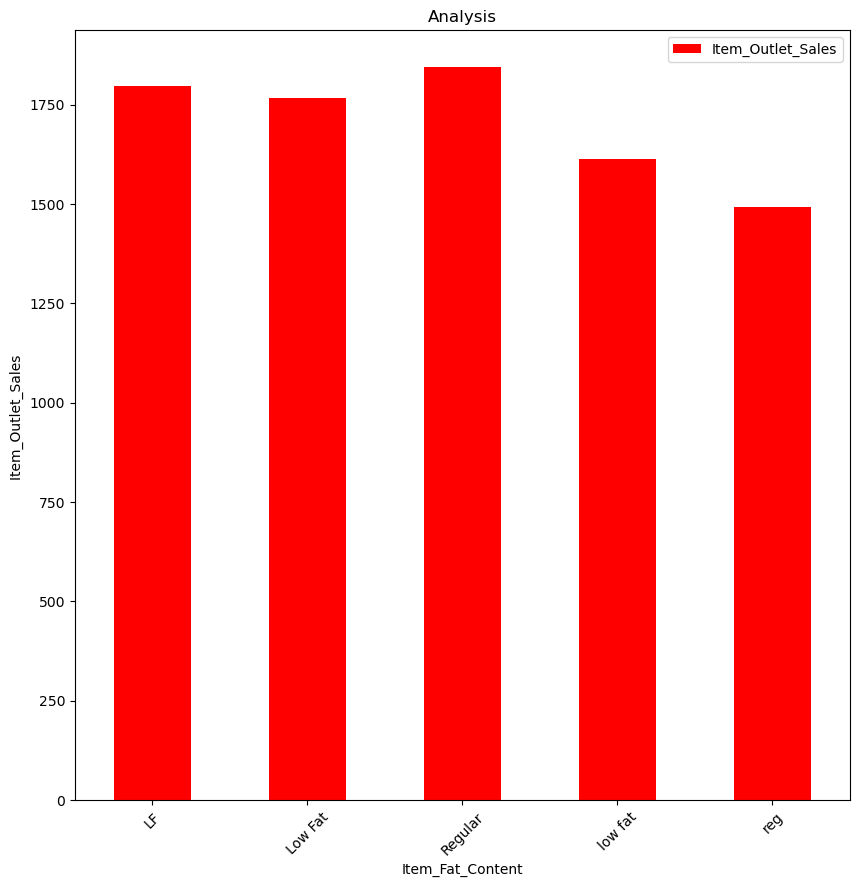

In [64]:
Item_fat_pivot= \
train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_fat_pivot.plot(kind='bar',color='red',figsize=(10,10))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales ')
plt.title('Analysis')
plt.xticks(rotation=45)

In [75]:
data['Item_Fat_Content'].value_counts()

Low Fat        9185
Regular        4824
Regular Fat     195
Name: Item_Fat_Content, dtype: int64

In [77]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Regular Fat':'Regular'})

In [78]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [79]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Regular Fat':'Regular'})

In [80]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1]), [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular')])

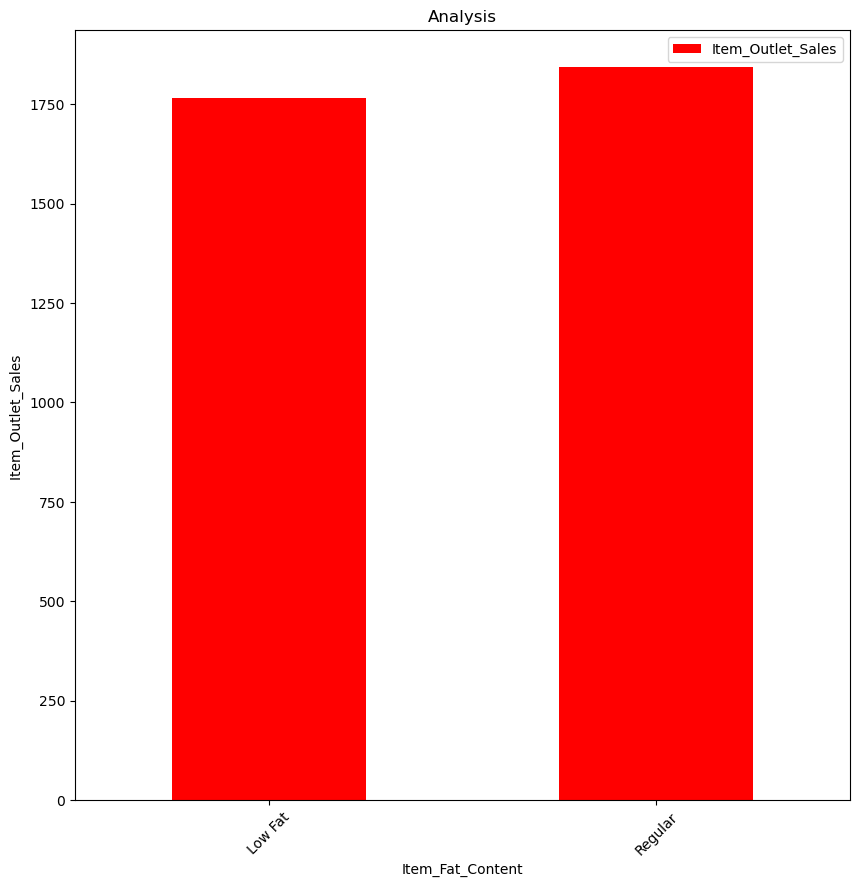

In [81]:
Item_fat_pivot= \
train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_fat_pivot.plot(kind='bar',color='red',figsize=(10,10))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales ')
plt.title('Analysis')
plt.xticks(rotation=45)

In [83]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

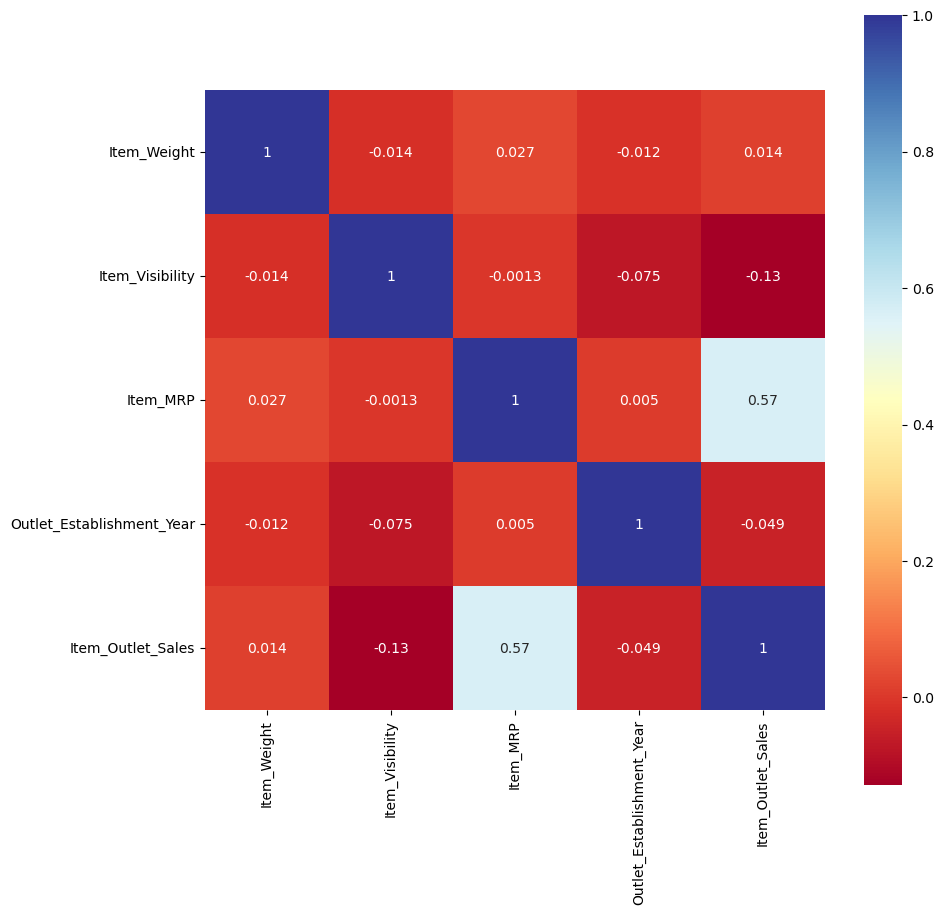

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),vmax=1,square=True,annot=True,cmap='RdYlBu')

# Feature Engineering and Transformation

In [87]:
# we are going to deal with null values

In [98]:
data['Item_Weight'].mean()

12.792854228644286

In [99]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [100]:
data['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [101]:
data['Outlet_Size'].fillna('Medium',inplace=True)

In [102]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [104]:
data.shape

(14204, 13)

In [106]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [109]:
data[data['Item_Visibility']==0]['Item_Visibility'].value_counts().sum()

879

In [110]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

In [113]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [115]:
data['Outlet_Years']=2010-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        12.169319
std          8.371664
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: Outlet_Years, dtype: float64

In [116]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [117]:
data['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [126]:
data['New_Item_Type']=data['Item_Identifier'].apply(lambda x: x[0:2])

In [127]:
data['New_Item_Type']=data['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

data['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [128]:
# If a product is non-consumable then why we are relating to fat so we are getting rid of this

In [129]:
data.loc[data['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] ='Non_Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64

In [131]:
item_visib_avg=data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [132]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [135]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
data['item_visib_avg'] = data.apply(function,axis=1).astype(float)

In [138]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
data['Outlet'] = label.fit_transform(data['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet']
for i in varib:
    data[i] = label.fit_transform(data[i])


In [139]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_Type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,11,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,1,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,11,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,12,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,23,2,0.000000,1


In [141]:
#Dummy Variables:

data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet'])
data.dtypes 

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [142]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,11,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,11,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,12,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,23,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,13,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,1,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,8,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,Canned,214.6218,OUT017,2007,NaN,test,3,...,0,0,1,0,0,0,0,0,0,0


# Model Building

In [143]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [145]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [146]:
train.drop(['source'],axis=1,inplace=True)

In [147]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [148]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

# Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [155]:
lr_pred = lr.predict(X_test)

In [156]:
lr_pred

array([1844.08821509, 1569.9023178 , 1871.14116321, ..., 1805.82428049,
       3573.54521621, 1263.41875663])

In [157]:
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

56

# Decision Tree Regression

In [158]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [159]:
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [160]:
tree_accuracy = round(tree.score(X_train,y_train)*100)
tree_accuracy

62

# Random Forest Regressor

In [161]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(X_train,y_train)

rf_accuracy = round(rf.score(X_train,y_train)*100)

rf_accuracy

61

# XG Boost Regressor

In [162]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [163]:
y_pred = model.predict(X_test)
y_pred

array([1664.3966 , 1333.0413 ,  570.20526, ..., 1929.1438 , 4002.653  ,
       1288.9634 ], dtype=float32)

In [164]:
model.score(X_train, y_train)*100

67.61550606303784

Output might not be same all the time you run the code. It may go up or down. In the real world scenario, we save the model as soon we get the highest accuracy.